In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
import pickle

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [4]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [6]:
X_mid, X_test, y_mid, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

### Logistic Regression ###

In [8]:
logistic = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logistic_pred = logistic.predict(X_val)

In [11]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[11463  7523]
 [ 5260 17164]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.70      0.77      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.68      0.69     41410
weighted avg       0.69      0.69      0.69     41410



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic score: 0.693697


In [12]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.7583484398196556


In [13]:
logistic_pred_test = logistic.predict(X_test)

In [14]:
print('Logistic Results:')
print(confusion_matrix(y_test,logistic_pred_test))
print(classification_report(y_test, logistic_pred_test))

Logistic Results:
[[11397  7589]
 [ 5220 17204]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.77      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.68      0.68     41410
weighted avg       0.69      0.69      0.69     41410



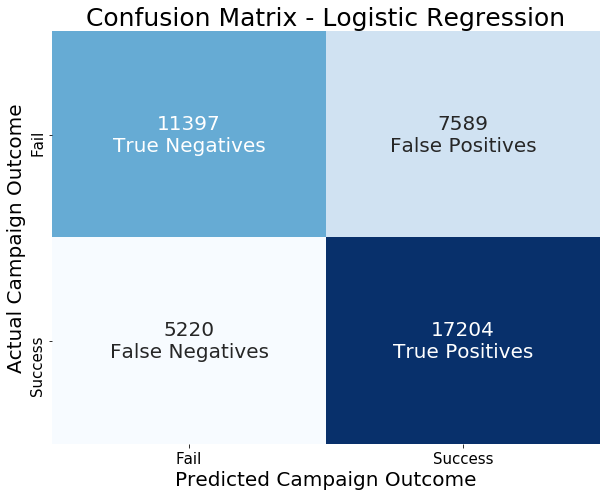

In [15]:
cm = confusion_matrix(y_test,logistic_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Logistic Regression', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
#plt.savefig('Confusion_matrix_Logistic.png')
#plt.savefig('Confusion_matrix_Logistic.svg')
plt.show()

In [16]:
logistic_y_score_test = logistic.predict_proba(X_test)[:, 1]
logistic_fpr_test, logistic_tpr_test, logistic_auc_thresholds = roc_curve(y_test, logistic_y_score_test)
roc_auc_logistic_test = auc(logistic_fpr_test, logistic_tpr_test)
print(auc(logistic_fpr_test, logistic_tpr_test))

0.7557359472001808


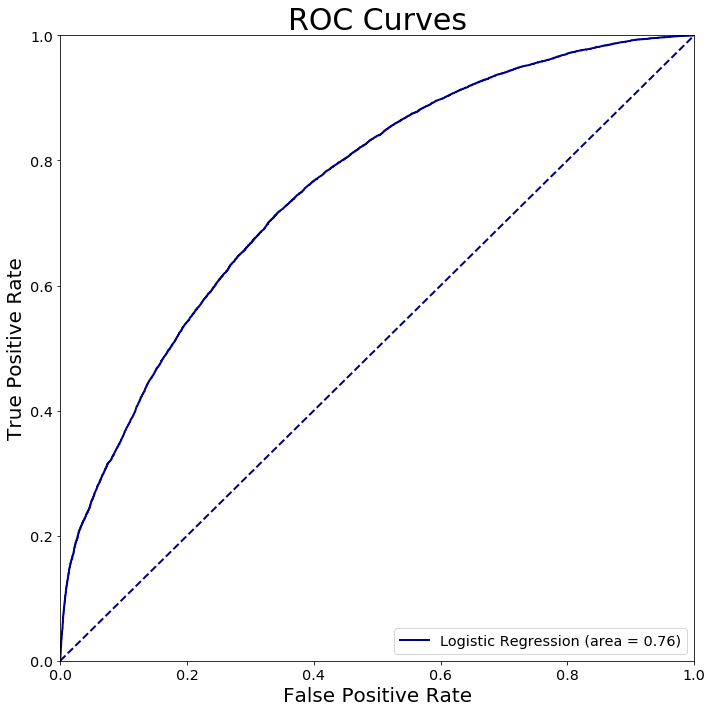

In [60]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='darkblue',
         lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [19]:
#filename = 'finalized_logistic_regression_no_scale.sav'
#pickle.dump(logistic, open(filename, 'wb'))